In [1]:
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


In [79]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate
from scipy.optimize import curve_fit
from scipy.signal import argrelextrema
import matplotlib.image as mpimg
import matplotlib.patches as patches
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
matplotlib.rcParams.update({
        'xtick.labelsize'     : 20         ,
        'ytick.labelsize'     : 20         ,
        'font.size'           : 20         ,
        'figure.autolayout'   : True       ,
        'figure.figsize'      : [7.2,4.45] ,
        'axes.titlesize'      : 22        ,
        'axes.labelsize'      : 18         ,
        'lines.linewidth'     : 2          ,
        'lines.markersize'    : 5          ,
        'legend.fontsize'     : 20          }) 
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
matplotlib.rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
def unosc(x,freq):
    N = len(x)
    new_x = []
    new_its = []
    for i in range(0,N,freq):
        if i+freq < N:
            w = np.average(x[i:i+freq],axis=0)
            new_x += [w.tolist()]
            
        else:
            w = np.average(x[-freq:],axis=0)
            new_x += [w.tolist()]
    new_x = np.asarray(new_x)
    
    return (new_x)


def simple_average(x,freq):
    N = len(x)
    new_x = np.zeros(N)
    for i in range(N):
        if i < freq:
            new_x[i] = np.average(x[0:i+freq+1])
        elif N-i <= freq:
            new_x[i] = np.average(x[i-freq:])
        else:
            new_x[i] = np.average(x[i-freq:i+freq+1])
            
    return new_x

def time_average_array(array,time):

    #time = time[~np.isnan(array)[:,0]]
    #array = array[~np.isnan(array)[:,0]]
    
    array_bar = np.zeros(len(array))

    for i in range(1,len(time)):
        array_bar[i] = array_bar[i-1] + .5*(array[i-1]+array[i])*(time[i]-time[i-1])
    array_bar[0] = array[0]
    for i in range(1,len(time)):
        array_bar[i] /= time[i]
    return (time,array_bar)
    
       
def find_nearest(array,value):
    idx = np.searchsorted(array, value, side="left")
    if idx > 0 and (idx == len(array) or math.fabs(value - array[idx-1]) < math.fabs(value - array[idx])):
        return idx-1
    else:
        return idx
    

In [109]:
energy_nm_= []
t = []
i = 0


data = open('toda_nm', 'r')    #Reads data through a .txt file

for line in data:
    line = line[:-1]  #Removes newline
    line = line.split(" ")
    line[:] = [float(x) for x in line if x != '']
    if i == 0:
        parameters = line
        i+=1

    else:
        t += [line[0]]
        energy_nm_ += [line[1:]]
        
data.close()
t = np.array(t[:])
energy_nm_ = np.array(energy_nm_[:])
energy_prop = energy_nm_/sum(energy_nm_[0,:])
modes = len(energy_nm_[0])

<IPython.core.display.Javascript object>


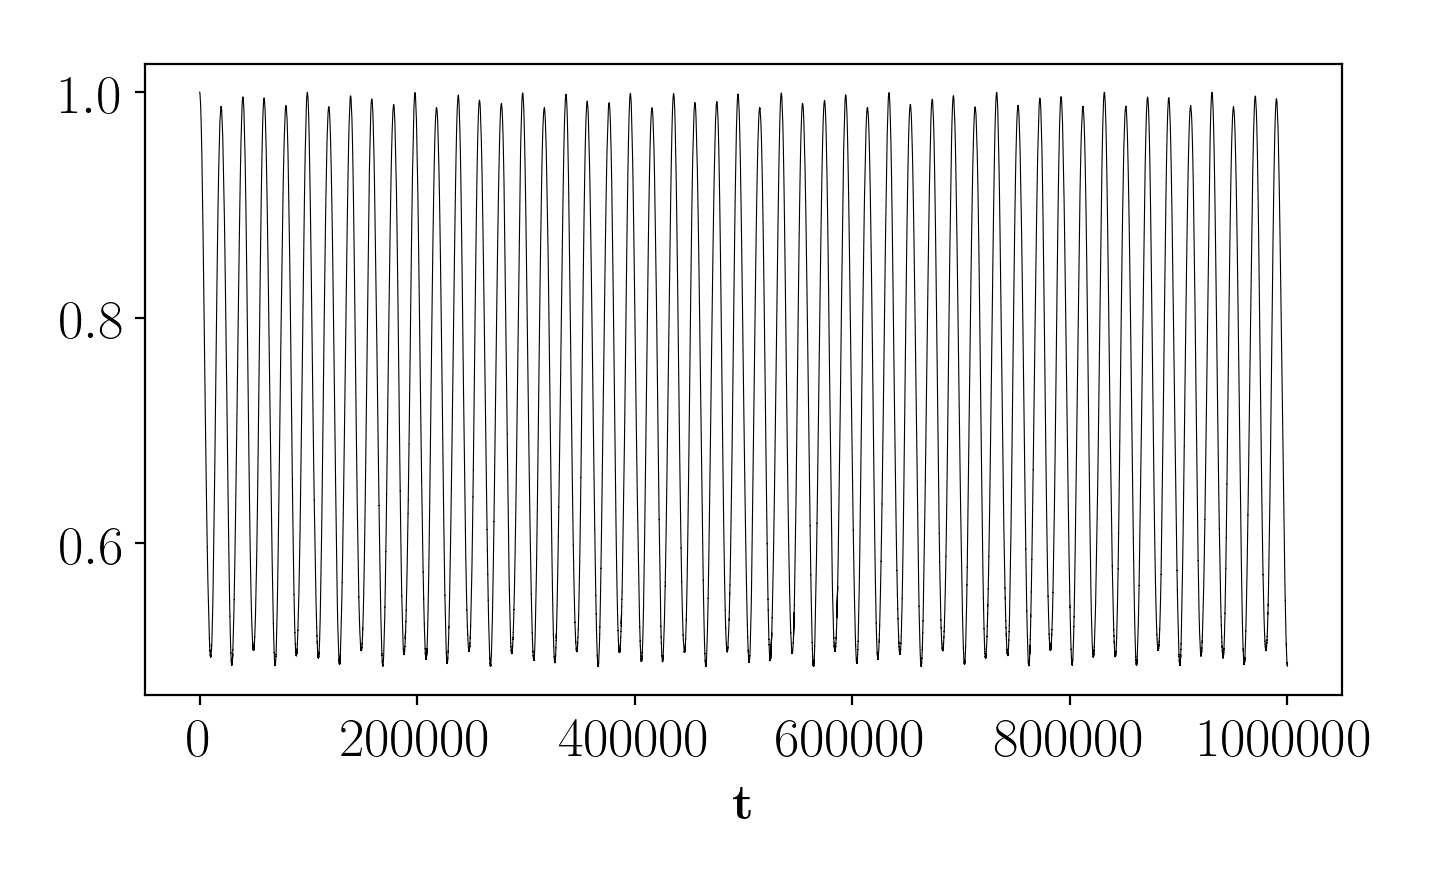

N= 31.0


array([1.92610933e-02, 1.30461324e-36, 2.53972809e-35, 2.64801105e-34,
       2.72641363e-32, 7.91284981e-34, 2.33764254e-33, 1.41022955e-33,
       2.09523553e-32, 1.12475944e-31, 0.00000000e+00, 5.18085439e-32,
       1.35626881e-31, 4.47862368e-33, 1.34979720e-31, 4.62704669e-32,
       8.12892252e-31, 7.12166045e-31, 1.07836872e-30, 3.07737324e-32,
       3.47141362e-33, 7.91109938e-34, 1.22958085e-34, 3.74497332e-33,
       1.08043050e-34, 7.54507701e-33, 2.04441549e-33, 4.17375513e-31,
       3.88959464e-31, 3.15474243e-32, 6.60842698e-30])

In [110]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(t,energy_prop[:,0],label='Mode: '+str(i+1),linewidth = .4,color='k')
ax.set_xlabel(r'$\textbf{t}$')
#ax.set_xlim(left=0,right=600000)
#ax.set_ylim(bottom=0,top=.1)

#ax.set_ylabel(r'$\boldsymbol{E\alpha^{2}}$')
print('N= '+str(parameters[0]))
#print('dt=' + str(parameters[4]))
energy_nm_[0]

<IPython.core.display.Javascript object>


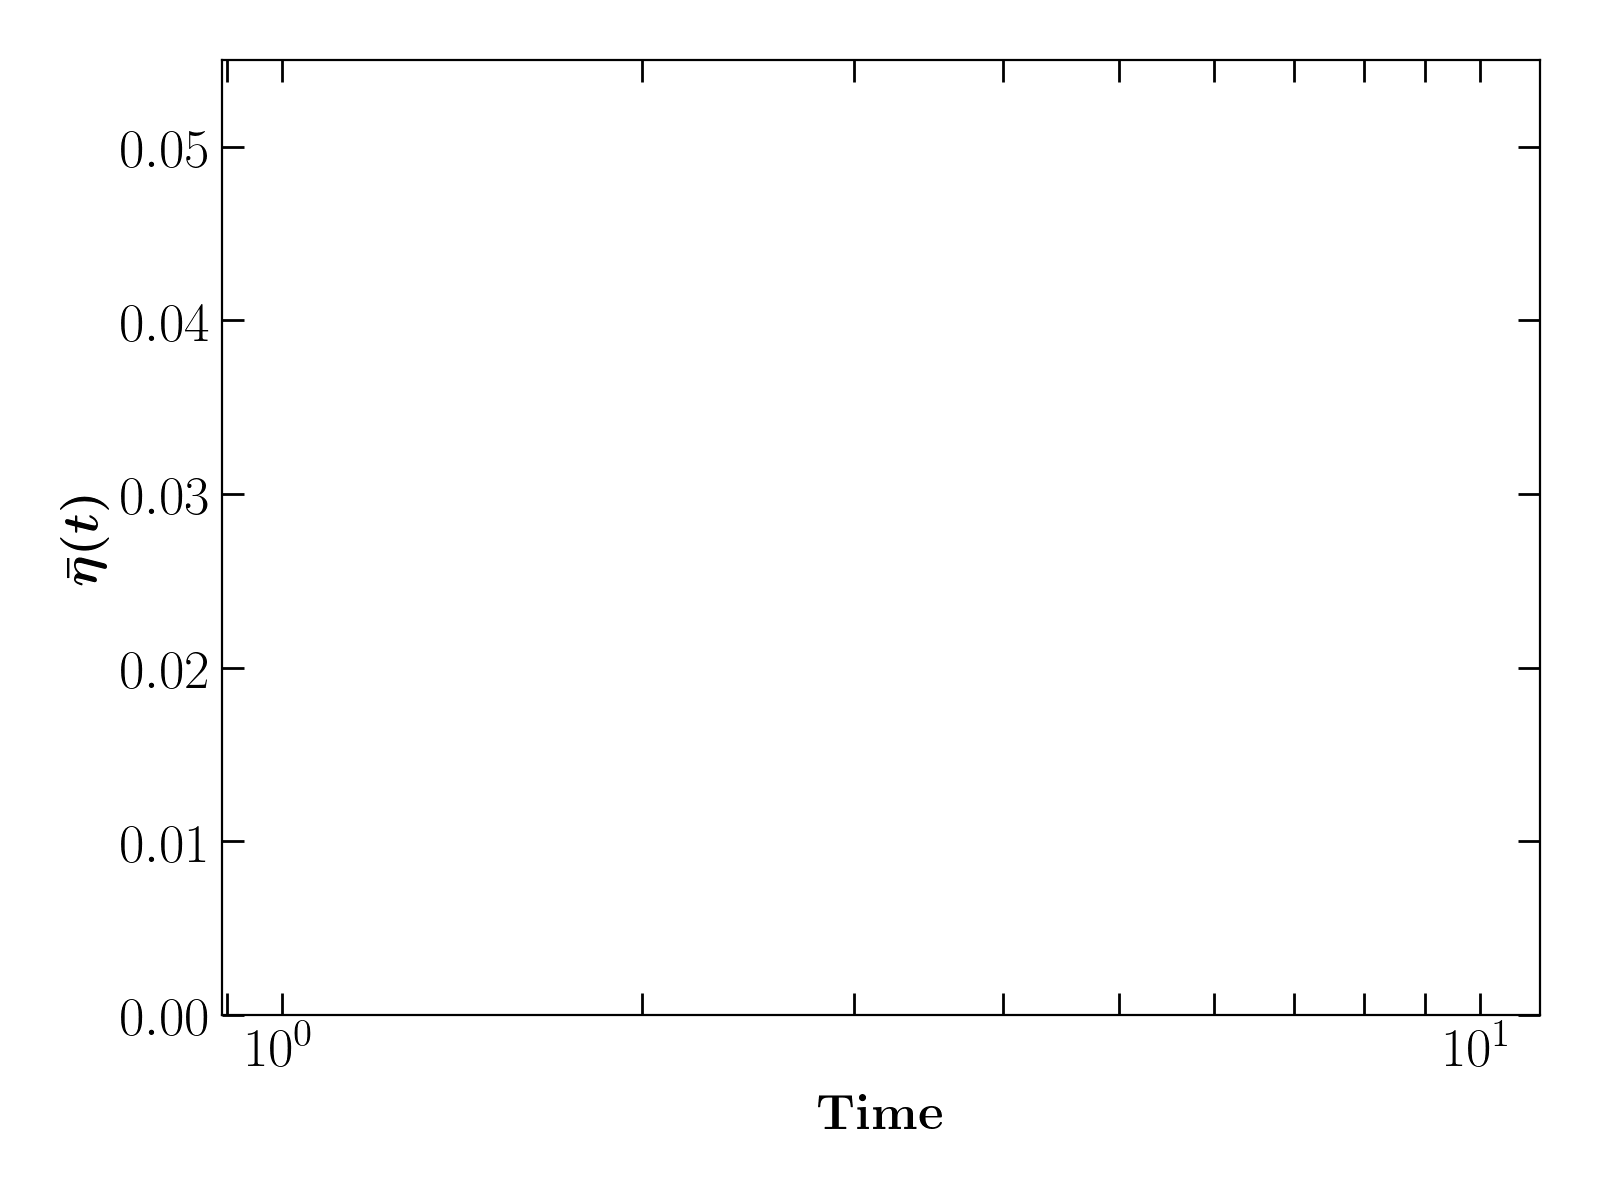

nan


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':


(0, 0.05500000000000001)

In [111]:
#Spectral_entropy_general



fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
energy_nm_norm = energy_nm_/energy_nm_[0,0]

spectral_energy = -np.sum(energy_nm_norm[:,:]*np.log(abs(energy_nm_norm[:,:])),axis=1)
print(spectral_energy[0])
norm_spectral_energy = (spectral_energy-np.log(parameters[0]))/(spectral_energy[0]-np.log(parameters[0]))
(Nt,NSE) = time_average_array(norm_spectral_energy,t)

ax.semilogx(Nt,NSE,color='red')

    
ax.set_xlabel(r'$\textbf{Time}$')
ax.set_ylabel(r'$\boldsymbol{\bar{\eta}(t)}$')
ax.tick_params(which='both',direction='in', length=8, width=1,top=True, right=True)
ax.set_ylim(bottom=0)

In [113]:
-np.sum(energy_nm_norm[:,:]*np.log(abs(energy_nm_norm[:,:])),axis=1)
energy_nm_[0]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in multiply
  """Entry point for launching an IPython kernel.


array([1.92610933e-02, 1.30461324e-36, 2.53972809e-35, 2.64801105e-34,
       2.72641363e-32, 7.91284981e-34, 2.33764254e-33, 1.41022955e-33,
       2.09523553e-32, 1.12475944e-31, 0.00000000e+00, 5.18085439e-32,
       1.35626881e-31, 4.47862368e-33, 1.34979720e-31, 4.62704669e-32,
       8.12892252e-31, 7.12166045e-31, 1.07836872e-30, 3.07737324e-32,
       3.47141362e-33, 7.91109938e-34, 1.22958085e-34, 3.74497332e-33,
       1.08043050e-34, 7.54507701e-33, 2.04441549e-33, 4.17375513e-31,
       3.88959464e-31, 3.15474243e-32, 6.60842698e-30])